In [1]:
import pandas as pd
import numpy as np

In [15]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv("train.csv", usecols = ['Age', 'Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [8]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
X_train, X_test, y_train,y_test = train_test_split(df.iloc[:,1:3], df.iloc[:,0], test_size = 0.2, random_state = 42)

X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


C:\Users\DELL\AppData\Local\Temp\ipykernel_16544\3644446684.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


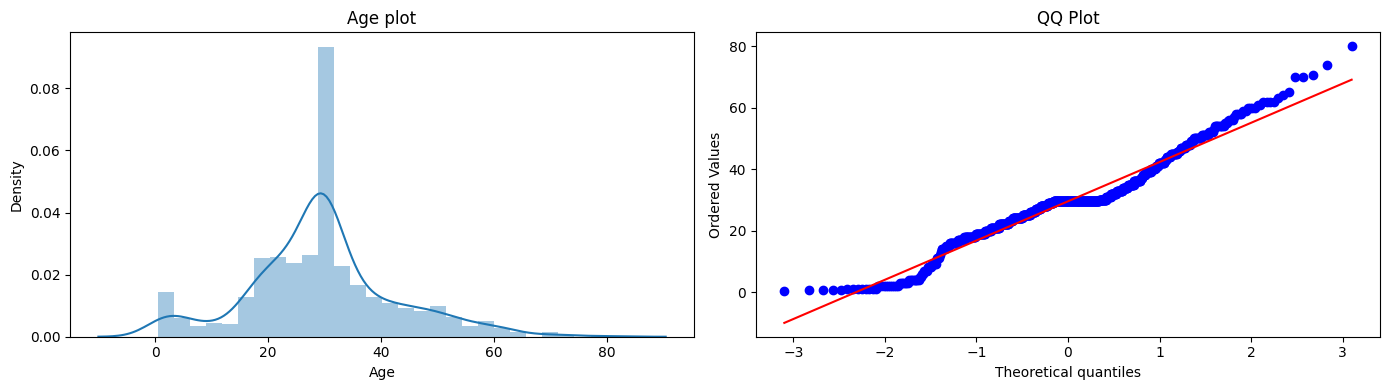

In [19]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title("Age plot")

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title("QQ Plot")

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16544\2711267045.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


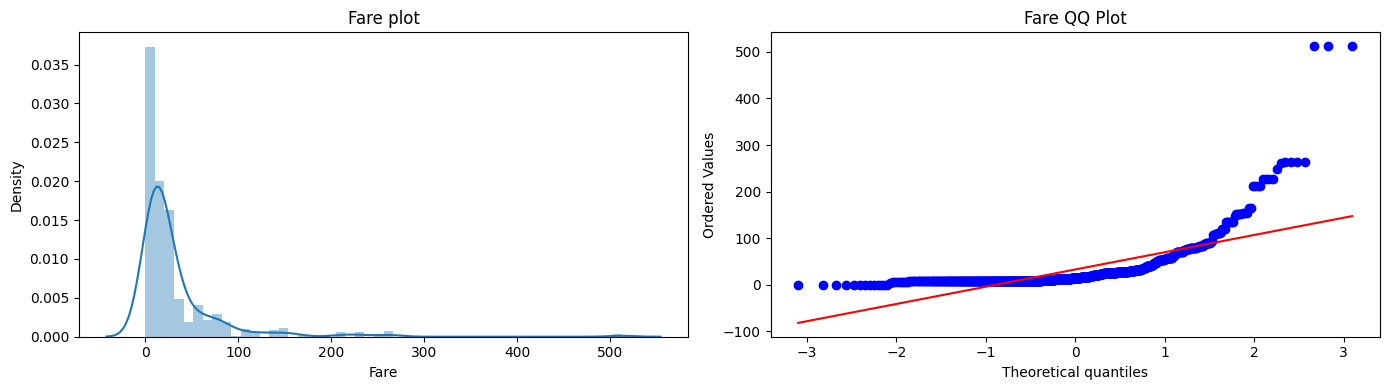

In [18]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title("Fare plot")

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title("Fare QQ Plot")

plt.tight_layout()
plt.show()

In [20]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [21]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy score of LR: ", accuracy_score(y_test, y_pred))
print("Accuracy score of DT:", accuracy_score(y_test, y_pred1))

Accuracy score of LR:  0.6480446927374302
Accuracy score of DT: 0.6536312849162011


In [22]:
trf = FunctionTransformer(func = np.log1p)

In [25]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [26]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [28]:
clf1.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf1.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy score of LR: ", accuracy_score(y_test, y_pred))
print("Accuracy score of DT:", accuracy_score(y_test, y_pred1))

Accuracy score of LR:  0.6815642458100558
Accuracy score of DT: 0.6759776536312849


In [30]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed, y,scoring ='accuracy', cv =10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, y,scoring ='accuracy', cv =10)))

LR 0.678027465667915
DT 0.6599625468164794


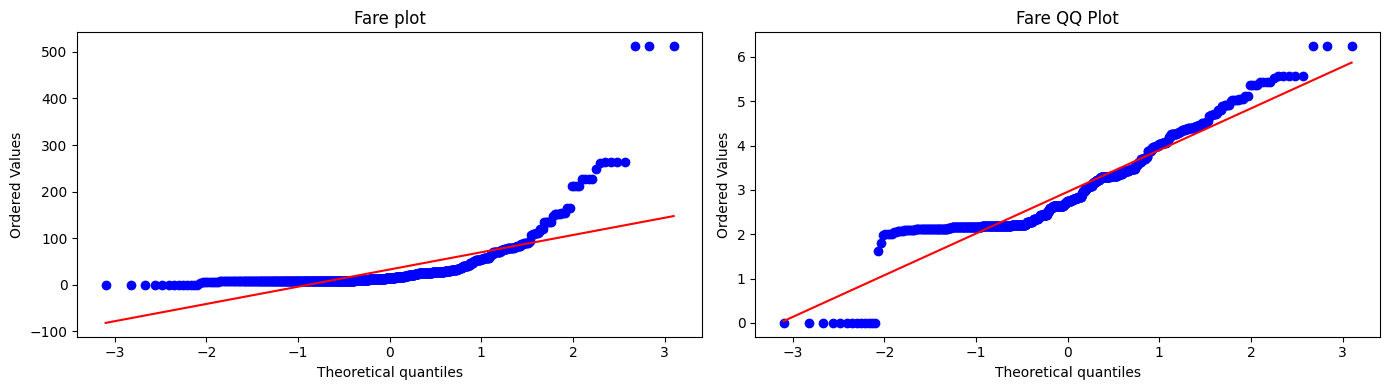

In [32]:
plt.figure(figsize = (14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot = plt)
plt.title("Fare plot")

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title("Fare QQ Plot")

plt.tight_layout()
plt.show()

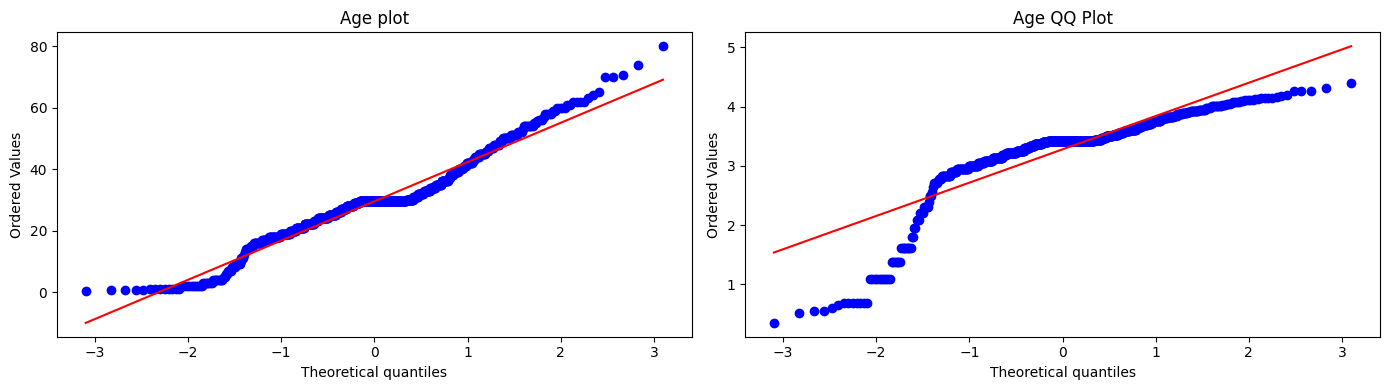

In [33]:
plt.figure(figsize = (14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot = plt)
plt.title("Age plot")

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title("Age QQ Plot")

plt.tight_layout()
plt.show()

In [34]:
trf2 = ColumnTransformer([
    ("log", FunctionTransformer(np.log1p),['Fare'])
], remainder = 'passthrough')

In [35]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [38]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred  = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Lr", accuracy_score(y_test, y_pred))
print("Dt", accuracy_score(y_test, y_pred2))

Lr 0.6703910614525139
Dt 0.664804469273743


In [39]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6599750312109862


In [42]:
def apply_transform(transform):
    trf2 = ColumnTransformer([
    ("log", FunctionTransformer(transform),['Fare'])
    ], remainder = 'passthrough')

    X_transformed2 = trf2.fit_transform(X)

    clf = LogisticRegression()
    clf2 = DecisionTreeClassifier()

    print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))

In [45]:
apply_transform(lambda x : X**2)

LR 0.6442322097378277
